# Global Power Plant Project

Problem Statement

In this project, we have to make two predictions. 1)capacity_mw ; 2)primary_fuel , depending on various independent variables. This is a Regression problem for "capacity_mw" and multiclass Classification problem for "primary_fuel".

In [71]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [72]:
#Importing the dataset

df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Exploratory Data Analysis (EDA)

In [73]:
#Checking the shape of the dataset

df.shape

(907, 27)

The dataset contains 907 rows and 27 columns, of which we have to predict 'capacity_mw' and 'primary_fuel'

In [74]:
#Checking the columns of the datset

df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [75]:
#Checking the Info (RangeIndex, datatypes, columns and memory usage of the dataset)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [76]:
#Checking the number of unique values in each column of the dataset
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [77]:
#Checking the null values present in the dataset

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [78]:
#Checking the value counts of each column in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)
    print('\n')

IND    907
Name: country, dtype: int64
**************************************************


India    907
Name: country_long, dtype: int64
**************************************************


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
**************************************************


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
**************************************************


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5      

Observations:

1. Since country, country_long, other_fuel2, generation_data_source, and year_of_capacity_data have the same values throughout the dataset, we can remove these columns.

2. The column "gppd_idnr" is a unique alphanumerical character for the power plant; we can also remove this column.

3. The columns 'wepp_id','other_fuel1','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh' and 'owner' have 0 non-null values or high number of NaN values, so we can also remove these columns.

4. It can also be observed that the columns "name", and "url" can also be removed as these columns has nothing to do with the prediction.

In [79]:
#Dropping the above mentioned columns

df.drop(columns= ['name','owner','url','gppd_idnr','country','country_long','year_of_capacity_data','generation_data_source', 'wepp_id','other_fuel1','other_fuel2','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [80]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

Imputing the null values in the dataset

In [81]:
#Dividing the dataset into numerical and categorical columns depedning on the data types of the columns
categorical_col= []
for i in df.dtypes.index:
    if df[i].dtypes==object:
        categorical_col.append(i)
        
print("Categorical Columns:", categorical_col)
print('\n')
print('*'*100)
print('\n')

numerical_col= []
for i in df.dtypes.index:
    if df[i].dtypes!=object:
        numerical_col.append(i)
        
print("Numerical Columns:", numerical_col)

Categorical Columns: ['primary_fuel', 'source', 'geolocation_source']


****************************************************************************************************


Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [82]:
#Filling geolocation_source with mode

df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [83]:
#Filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [84]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [85]:
#Checking the statistical information of each numerical column of our dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.72500,59.2000,385.250000,4760.000
latitude,907.0,23.125256,10.322840,8.1689,17.07200,22.1421,26.753750,59.200
longitude,907.0,76.538572,6.263960,59.2000,73.81155,76.4938,79.206100,95.408
commissioning_year,907.0,1185.185226,956.750996,59.2000,59.20000,1978.0000,2003.000000,2018.000
generation_gwh_2014,907.0,1100.329205,2914.072352,0.0000,59.20000,59.2000,556.562750,28127.000
generation_gwh_2015,907.0,1161.437454,3094.143089,0.0000,59.20000,59.2000,598.926350,30539.000
generation_gwh_2016,907.0,1211.781915,3119.562531,0.0000,59.20000,59.2000,670.039394,30015.000
generation_gwh_2017,907.0,1266.439354,3175.490873,0.0000,59.20000,59.2000,709.290725,35116.000
generation_gwh_2018,907.0,1314.589897,3286.682207,0.0000,59.20000,59.2000,687.754000,35136.000


Conclusion:
    
1. The count of every column is 907, which means there are no null values in the dataset.

2. The mean and median values of latitude and longitude are almost equal, so we can say that the distribution of these columns will be normally distributed.

3. The mean is much greater than the median in the rest of the columns, so the other columns are rightly skewed.

4. There's a huge difference between 75% and maximum, which indicates the presence of outliers in the dataset.

# Data Visualisation

Univariate Analysis

In [86]:
sns.set()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

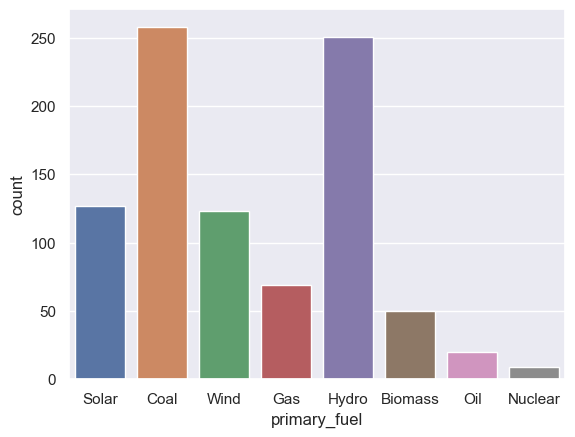

In [87]:
#Checking the count values of all the primary fuels

sns.countplot(x='primary_fuel', data=df)
df["primary_fuel"].value_counts()

    We can conclude that coal generates more electricity, followed by Hydro, Solar, and Wind.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

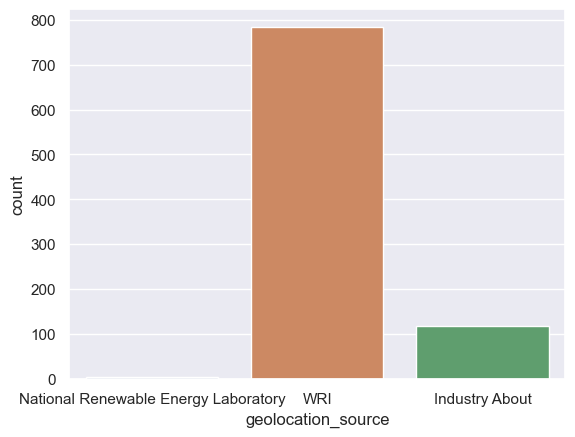

In [88]:
#Checking the value counts of all 3 geolocation sources

sns.countplot(x='geolocation_source', data=df)
df["geolocation_source"].value_counts()

It is very clear that WRI has the highest counts and NREL has the lowest.

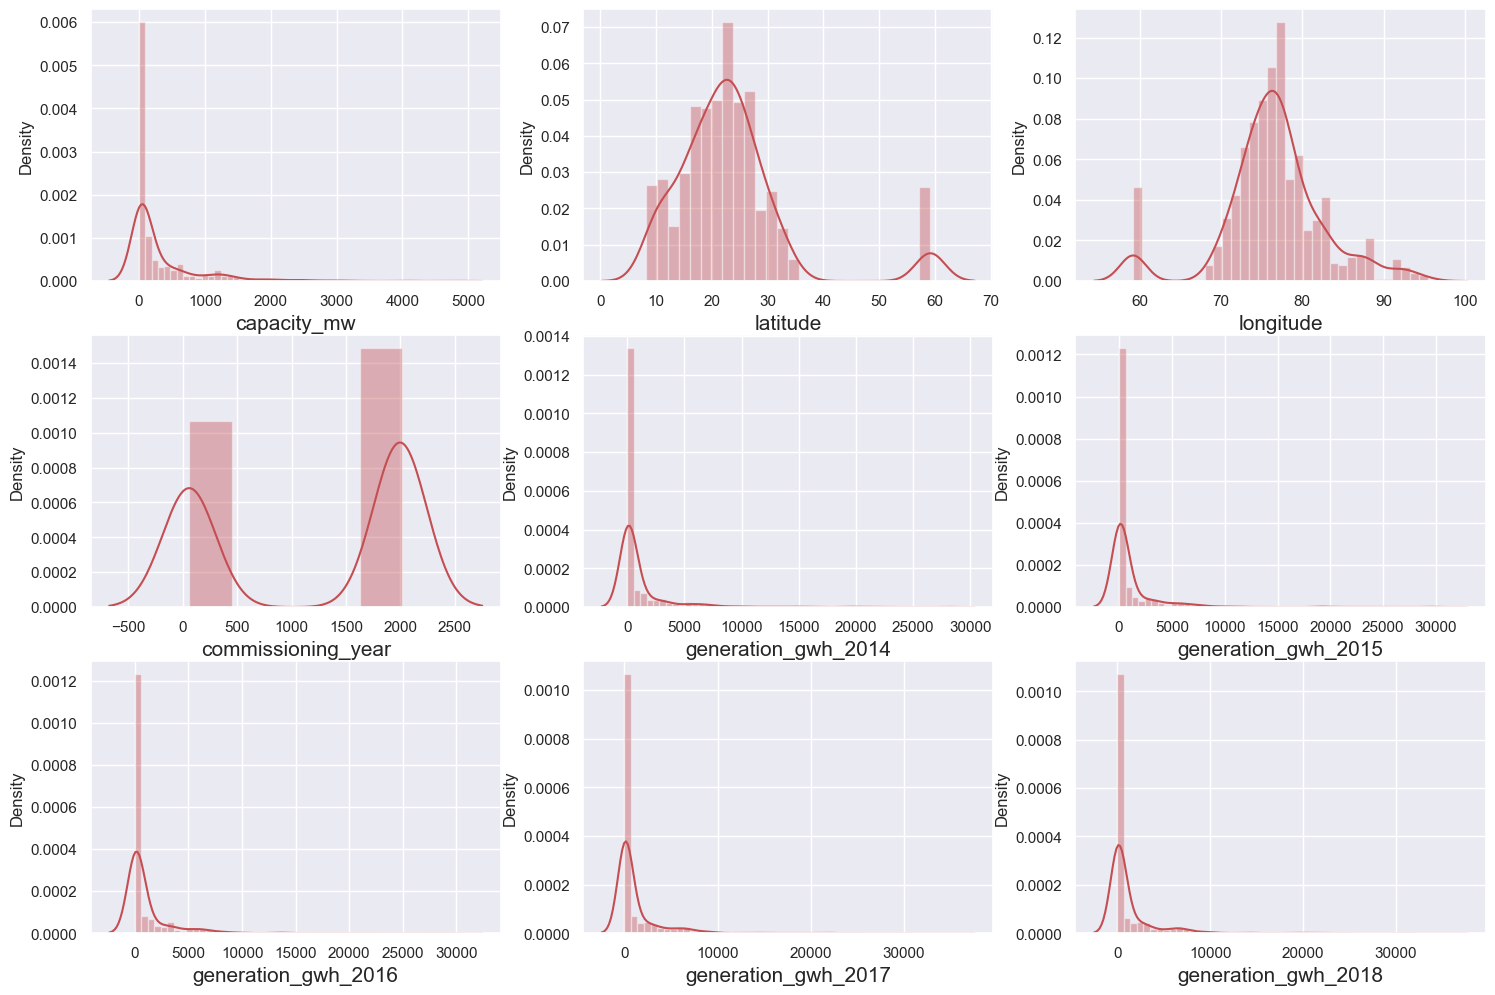

In [89]:
#Checking the distribution plots of all numerical columns in the dataset

plt.figure(figsize=(18,12))
plotnumber=1
for i in numerical_col:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[i],color='r')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

The above graph shows the distribution plot of all the numerical columns. Most of the columns are rightly skewed.

Bivariate Analysis

# Comparing target varibale "capacity_mw" with independent variables

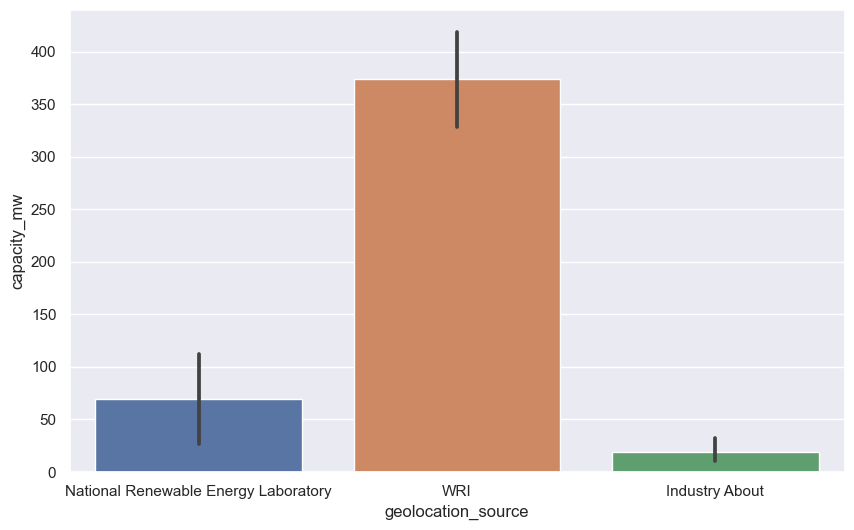

In [90]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

The capacity of the geolocation source WRI is maximum, which has a capacity of more than 350 megawatts. 

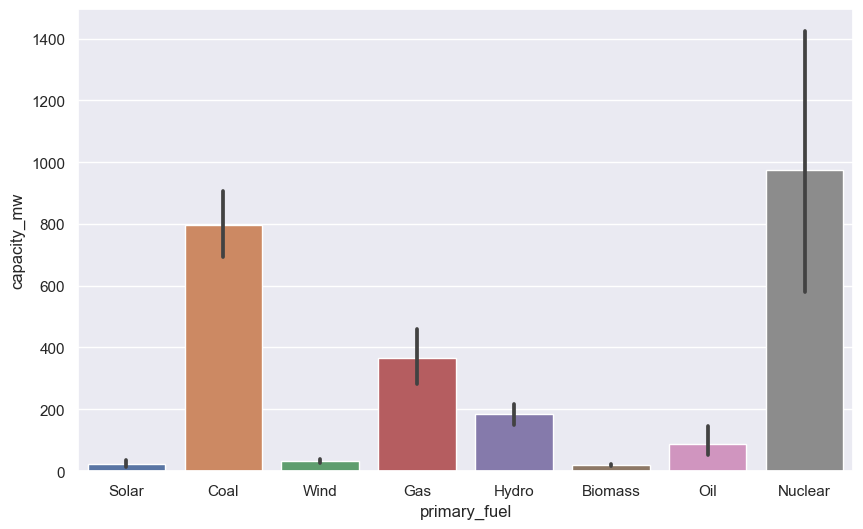

In [91]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'primary_fuel', y = 'capacity_mw', data=df)
plt.show()

The capacity of the primary fuel, nuclear, is the maximum, with a capacity of almost 1000 megawatts, whereas biomass, wind, and solar produce the least capacity.

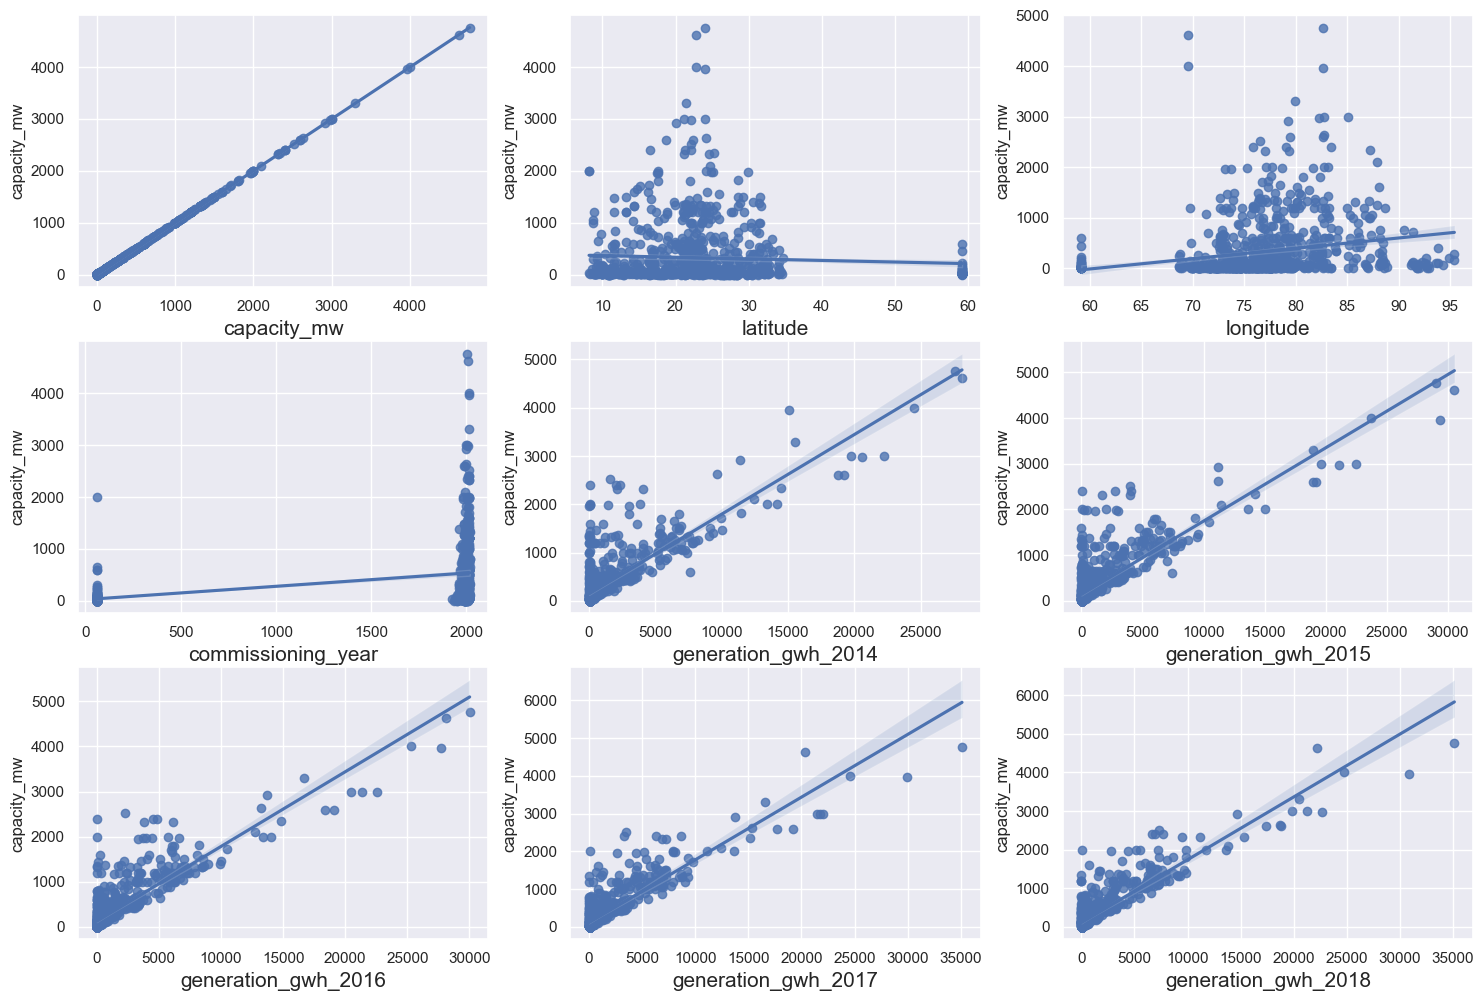

In [92]:
#Checking regplot of all numerical columns with the target variable capacity_mw -

plt.figure(figsize=(18,12))
plotnumber=1
for i in numerical_col:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.regplot(data = df, x = i, y = 'capacity_mw')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

Conclusion:
    
1. Latitude does not seem to have a linear relationship with our target variable. However, the latitude range between 10 and 30 generates more capacity as compared to high latitude, whereas longitude has a weak linear relationship with our target variable, but in this case, the longitude range between 70 and 85 generates more capacity.

2. We can observe that the capacity of older power plants is very low compared to recent power plants.

3. We can see a positive linear graph of capacity with generation growth from year 2014 to 2018.

# Comparing target varibale "primary_fuel" with independent variables

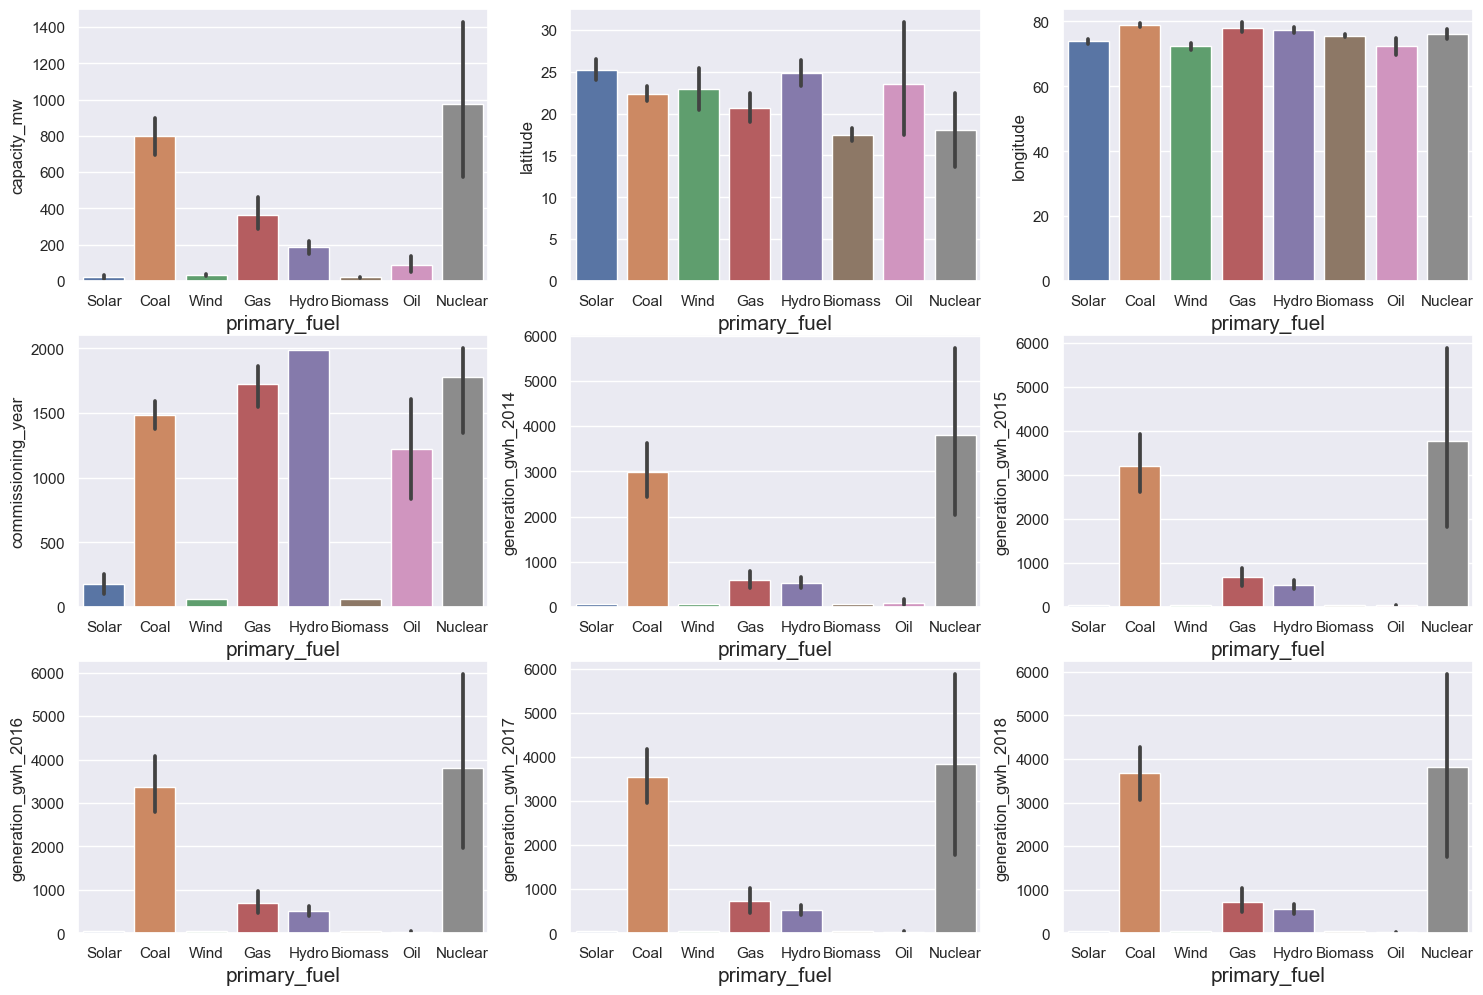

In [93]:
#Checking the bar plots of primary fuels when compared to different independent variables

plt.figure(figsize=(18,12))
plotnumber=1
for i in numerical_col:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(data = df, x = 'primary_fuel', y = i)
        plt.xlabel('primary_fuel',fontsize=15)
    plotnumber+=1
plt.show()

Conclusions:

1. The capacity of the primary fuel, nuclear, is the maximum, with a capacity of almost 1000 megawatts, whereas biomass, wind, and solar produce the least capacity.
    
2. The primary fuel, solar, has a high latitude of about 20, followed by hydro, oil, and coal.

3. The primary fuel Coal has a high longitude of about 80, followed by gas, nuclear, and hydro.

4. The power plants that were recently built use hydro, followed by nuclear, gas, and coal. Older power plants used Wind, Biomass and Solar fuels for the generation of electricity.

5. From 2014–2018, we can see that nuclear and coal fuels were used the most to generate electricity.

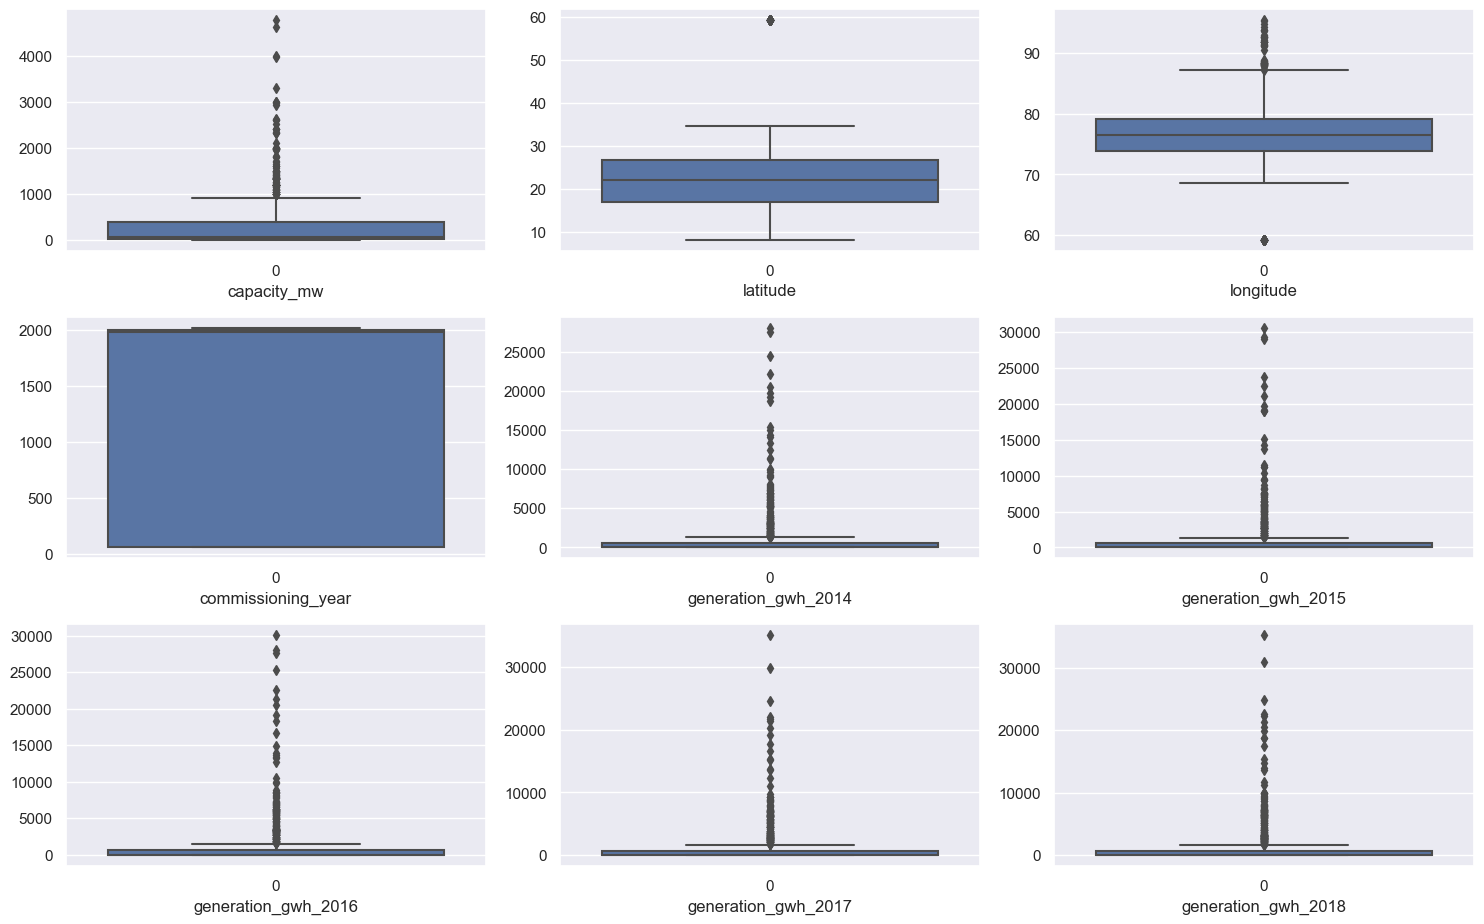

In [94]:
#Checking outliers in the dataset by plotting the box plots

plt.figure(figsize = (15,12))
plotnumber=1
for i in numerical_col:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Multivariate Analysis

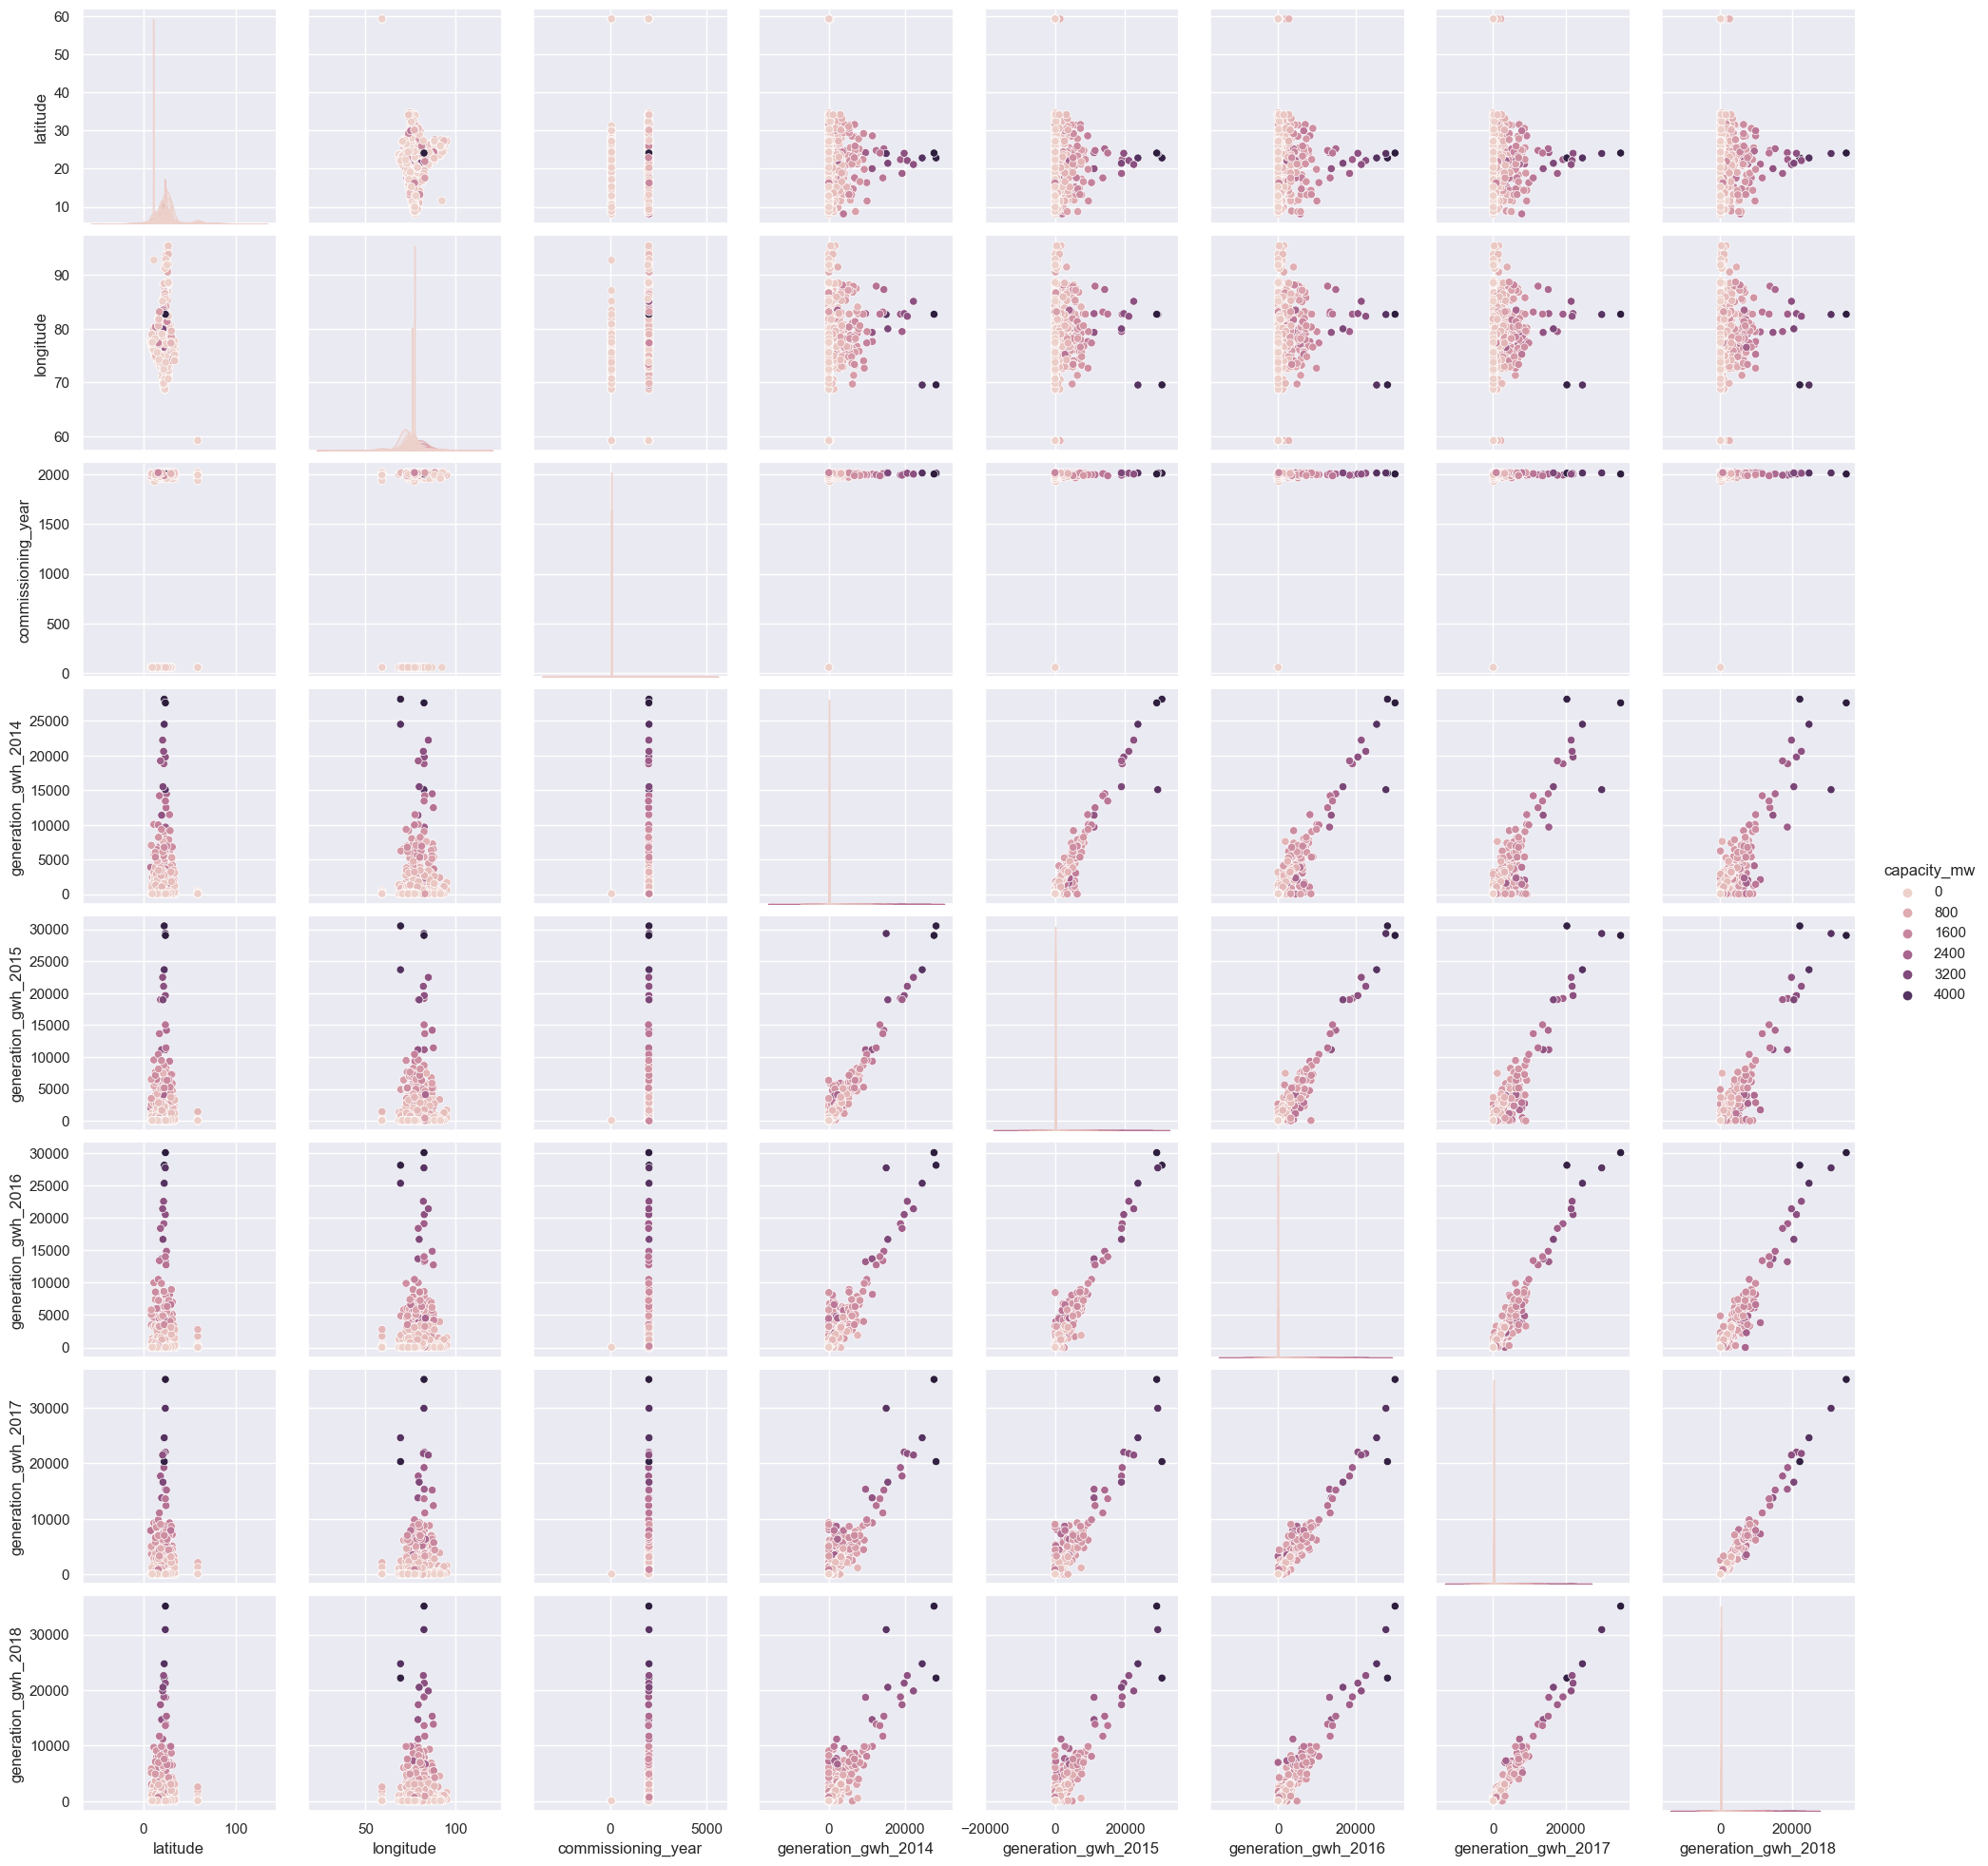

In [95]:
sns.pairplot(df,hue='capacity_mw')

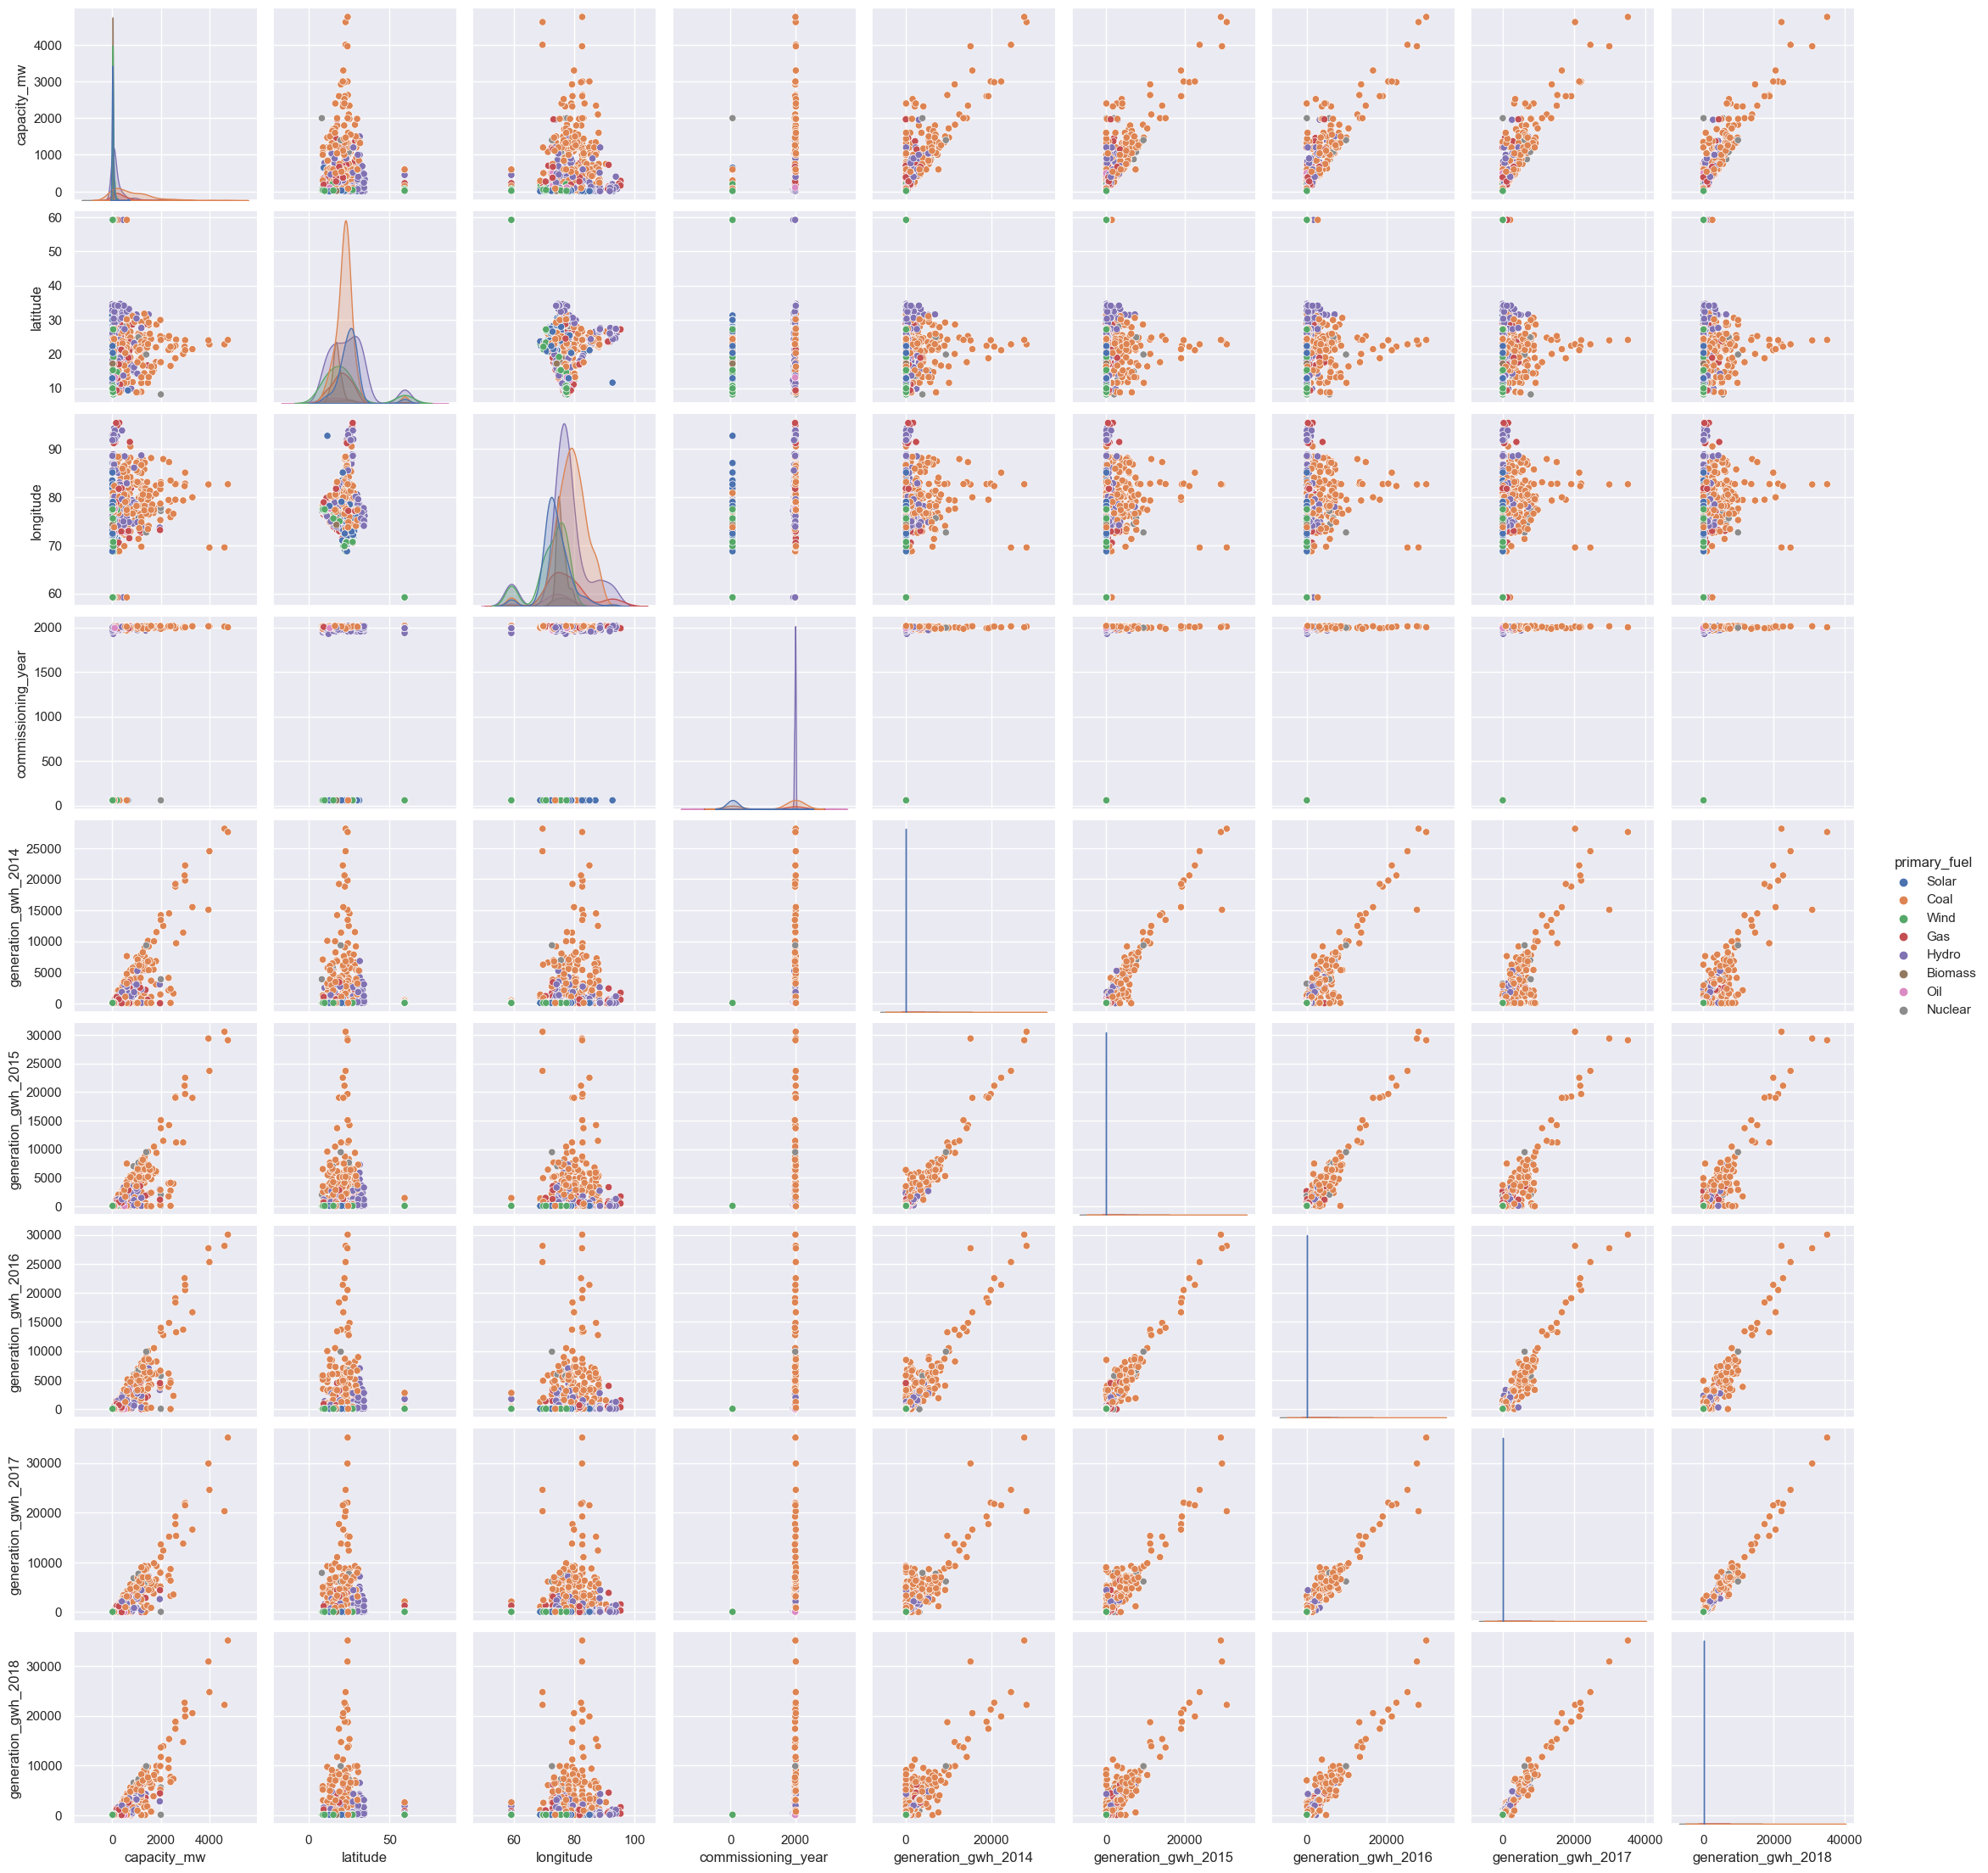

In [96]:
sns.pairplot(df,hue='primary_fuel')

Removing Outliers

In [97]:
from scipy.stats import zscore
features=df[['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z=np.abs(zscore(features))
z

,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.490314,0.526774,0.357473,0.356430,0.369673,0.380384,0.382173
1,0.159060,0.308213,0.357473,0.356430,0.369673,0.380384,0.382173
2,0.118391,1.144536,0.357473,0.356430,0.369673,0.380384,0.382173
3,0.072301,2.367481,0.165681,0.102731,0.104488,0.189891,0.209552
4,0.112915,0.937708,0.664461,1.537600,1.613686,1.297882,1.815722
...,...,...,...,...,...,...,...
902,0.662039,0.130697,0.357473,0.375252,0.313738,0.126362,0.191207
903,0.991752,0.259856,0.357473,0.356430,0.369673,0.380384,0.382173
904,0.760817,0.152938,0.357473,0.356430,0.369673,0.380384,0.382173
905,0.118710,0.445790,0.357473,0.356430,0.369673,0.380384,0.382173


In [98]:
np.where(z>3)

(array([ 14,  15,  15,  15,  15,  25,  42,  45,  67,  72, 143, 143, 143,
        143, 143, 158, 178, 192, 201, 208, 209, 209, 209, 209, 209, 250,
        308, 308, 308, 308, 308, 329, 330, 332, 333, 364, 364, 364, 364,
        364, 386, 420, 422, 430, 435, 440, 466, 478, 479, 482, 483, 493,
        493, 493, 493, 493, 494, 494, 494, 494, 494, 502, 519, 532, 538,
        540, 545, 623, 648, 648, 648, 648, 648, 655, 657, 657, 657, 657,
        657, 674, 680, 695, 695, 695, 695, 695, 705, 711, 712, 721, 721,
        721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
        731, 732, 741, 770, 773, 774, 775, 776, 784, 786, 786, 786, 786,
        786, 808, 808, 808, 808, 808, 828, 880, 880, 880, 880, 880, 884,
        886], dtype=int64),
 array([0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 2, 3, 4, 5, 6, 2, 0, 0, 0, 0, 2, 3,
        4, 5, 6, 0, 2, 3, 4, 5, 6, 0, 0, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 6, 0, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 0, 1, 2, 0, 0,
        0, 2, 2, 3, 

In [99]:
df1=df[(z<3).all(axis=1)]

In [100]:
df1.shape[0]

839

In [101]:
df.shape[0]

907

In [102]:
(df.shape[0]-df1.shape[0])/df.shape[0]*100

7.497243660418963

The above value shows the percentage loss of the data i.e, 7.5%

In [103]:
df=df[(z<3).all(axis=1)]
df.shape

(839, 12)

This is our new dataset after the removal of outliers.

In [104]:
categorical_col = ['primary_fuel', 'source','geolocation_source']

Encoding the categorical columns with integer values

In [105]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)

In [106]:
#Correlation between the target and independent variables

df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.047121,0.203922,-0.391732,0.473148,-0.278970,0.239931,0.666779,0.727128,0.794651,0.836102,0.854019
latitude,0.047121,1.000000,0.025469,-0.007082,0.089606,0.059443,-0.188387,0.081914,0.074750,0.061555,0.082291,0.071574
longitude,0.203922,0.025469,1.000000,-0.354818,0.427228,-0.238000,0.251946,0.142289,0.172720,0.208746,0.218772,0.216421
primary_fuel,-0.391732,-0.007082,-0.354818,1.000000,-0.464884,0.049151,-0.509762,-0.313015,-0.334925,-0.346603,-0.357501,-0.356471
commissioning_year,0.473148,0.089606,0.427228,-0.464884,1.000000,-0.559970,0.456182,0.395328,0.409287,0.416398,0.424400,0.423295
source,-0.278970,0.059443,-0.238000,0.049151,-0.559970,1.000000,-0.503712,-0.227865,-0.235349,-0.238985,-0.243409,-0.242759
geolocation_source,0.239931,-0.188387,0.251946,-0.509762,0.456182,-0.503712,1.000000,0.185176,0.191258,0.194213,0.197808,0.197280
generation_gwh_2014,0.666779,0.081914,0.142289,-0.313015,0.395328,-0.227865,0.185176,1.000000,0.928122,0.828003,0.775706,0.765494
generation_gwh_2015,0.727128,0.074750,0.172720,-0.334925,0.409287,-0.235349,0.191258,0.928122,1.000000,0.921285,0.855265,0.844289
generation_gwh_2016,0.794651,0.061555,0.208746,-0.346603,0.416398,-0.238985,0.194213,0.828003,0.921285,1.000000,0.944887,0.926609


<Axes: >

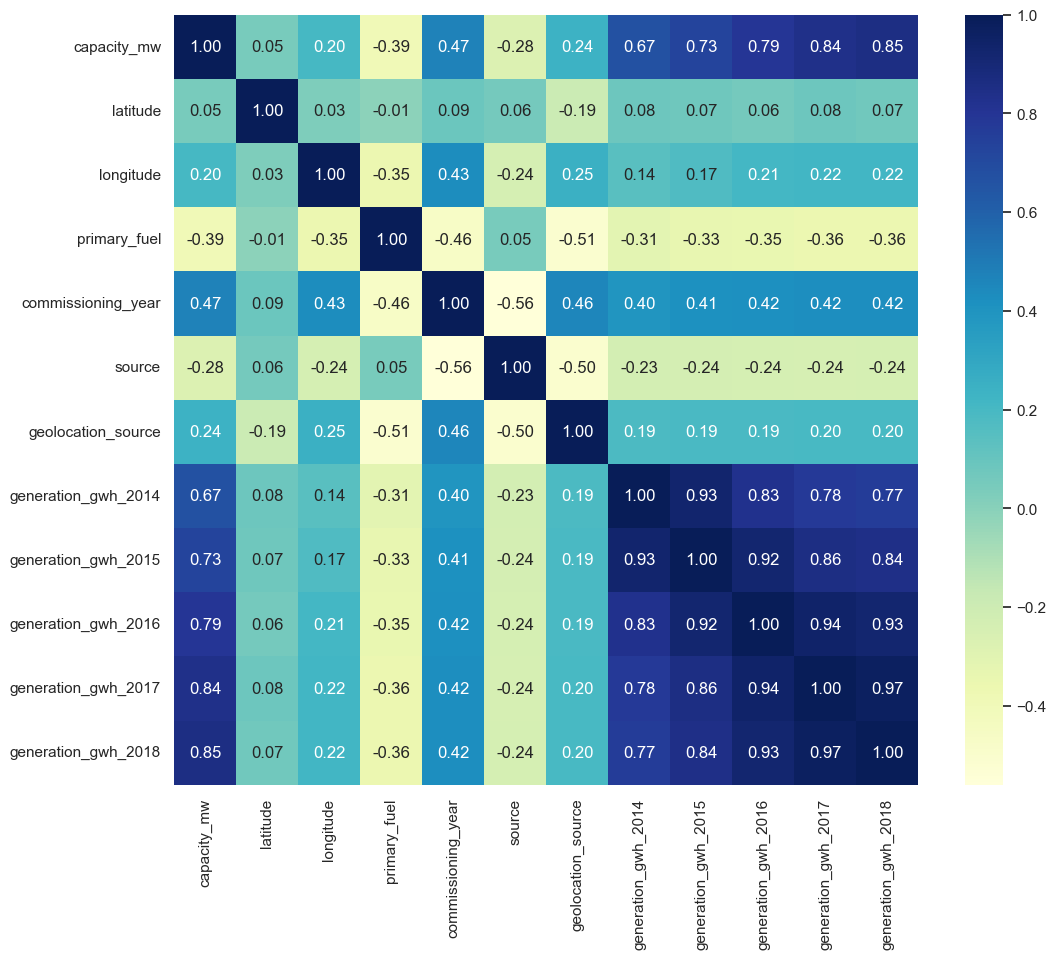

In [107]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, linecolor='black',fmt='0.2f',cmap='YlGnBu')

Conclusions:
    
1. The target variable "capacity_mw" is highly positively correlated with the features: generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and generation_gwh_2018.

2. The label "capacity_mw" is negatively correlated with the features primary_fuel and source.

3. The target variable "capacity_mw" has no relation to latitude and a weak correlation with longitude, commissioning_year, and geological_source.

4. The label "primary_fuel" has no correlation with source or latitude.

5. The label "primary_fuel" is negatively correlated with geolocation_souce, longitude, capacity_mw, commissioning_year, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and generation_gwh_2018.

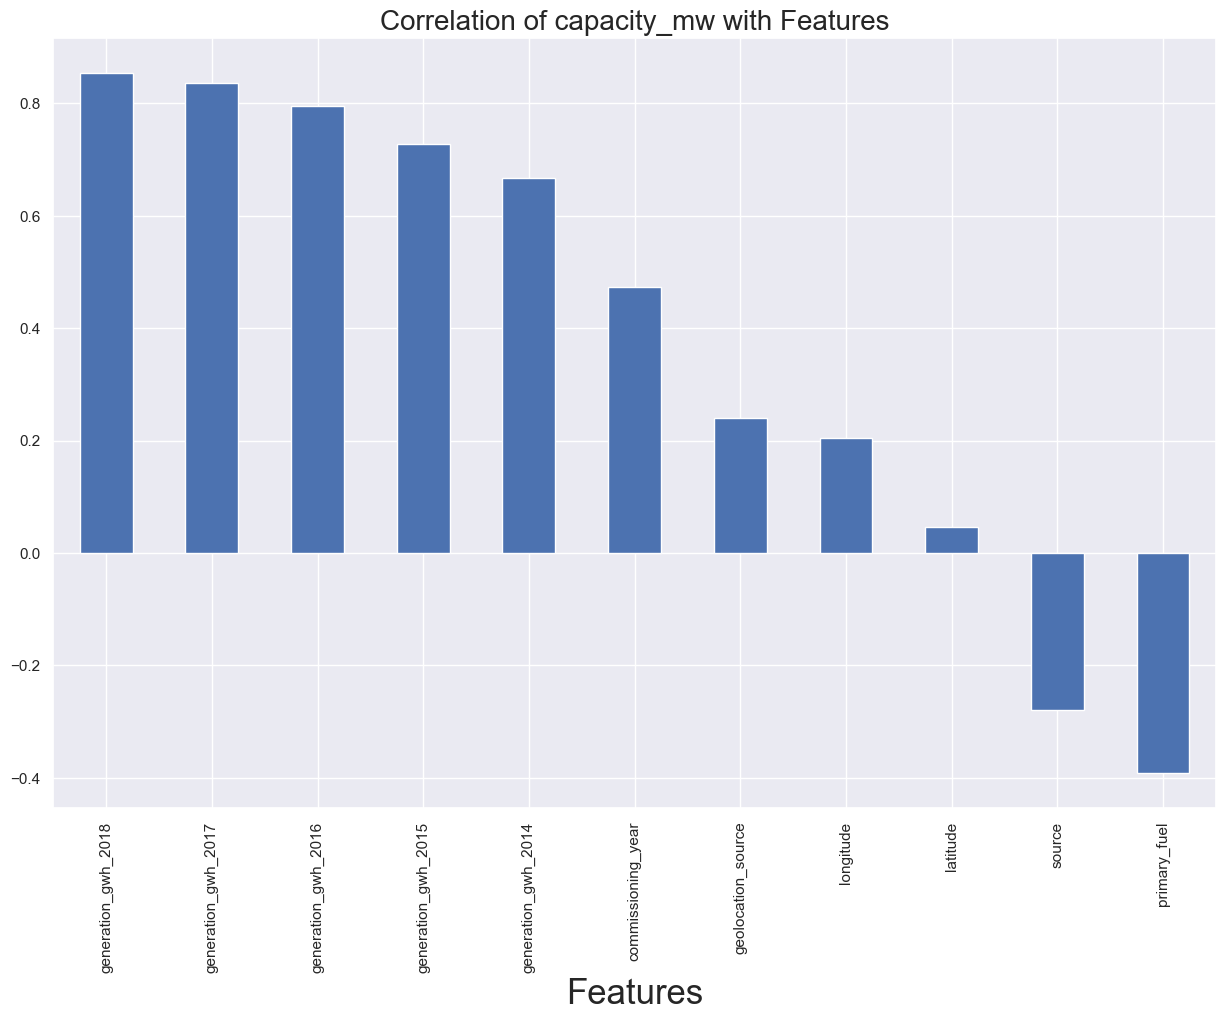

In [108]:
plt.figure(figsize=(15,10))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.title('Correlation of capacity_mw with Features',fontsize=20)
plt.xlabel('Features', fontsize=25)
plt.show()

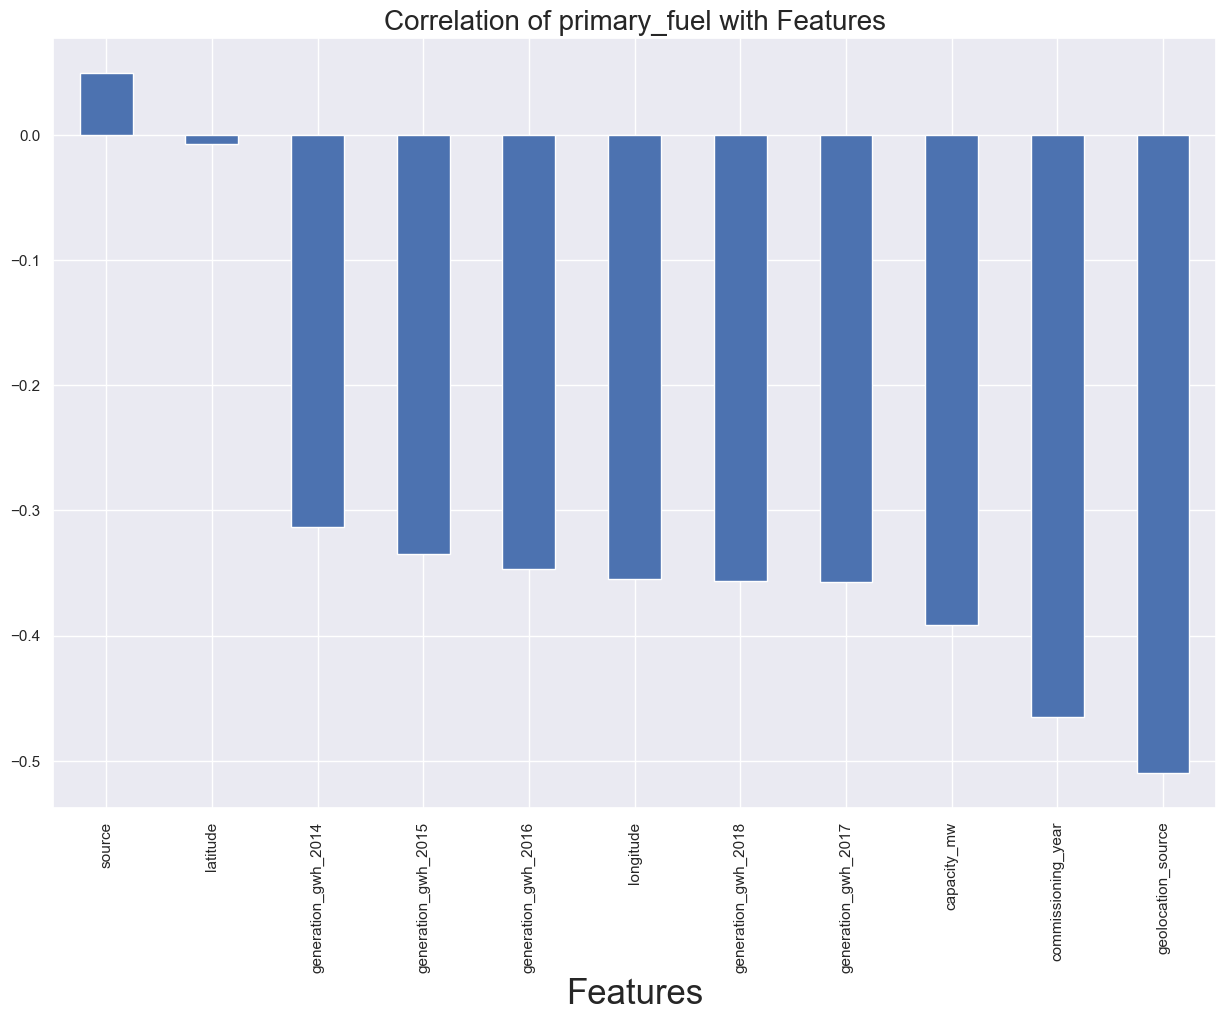

In [109]:
plt.figure(figsize=(15,10))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar')
plt.title('Correlation of primary_fuel with Features',fontsize=20)
plt.xlabel('Features', fontsize=25)
plt.show()

From both the bar plots, we can observe that the column "latitude" have very weak correlation with both the labels capacity_mw and primary_fuel, so we can drop this column.

In [110]:
df.drop('latitude',axis=1,inplace=True)

In [111]:
df.head()

,capacity_mw,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,73.2407,6,2011.0,109,1,59.200000,59.200,59.200000,59.200000,59.200000
1,98.0,74.6090,1,59.2,174,2,59.200000,59.200,59.200000,59.200000,59.200000
2,39.2,69.3732,7,59.2,21,2,59.200000,59.200,59.200000,59.200000,59.200000
3,135.0,91.3602,2,2004.0,22,2,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,82.4091,1,2015.0,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


Seperating Target and Features

In [43]:
X=df.drop('capacity_mw',axis=1)
Y=df['capacity_mw']

In [44]:
X.shape

(839, 10)

In [45]:
Y.shape

(839,)

In [46]:
#Checking the skewness of the dataset

X.skew()

longitude              1.131986
primary_fuel           0.467102
commissioning_year    -0.261980
source                 1.737582
geolocation_source    -2.028998
generation_gwh_2014    2.764519
generation_gwh_2015    2.571910
generation_gwh_2016    2.516675
generation_gwh_2017    2.427530
generation_gwh_2018    2.470001
dtype: float64

In [47]:
columns = ['source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','geolocation_source']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [48]:
X[columns] = scaler.fit_transform(X[columns].values)
X[columns].head()

,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source
0,1.526693,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826,-2.198171
1,1.981410,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826,0.414426
2,-0.488353,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826,0.414426
3,-0.422017,0.777245,0.912820,0.906763,0.723516,0.667060,0.414426
4,-0.422017,1.592380,1.876057,1.866284,1.753326,1.883303,0.414426


In [49]:
X.skew()

longitude              1.131986
primary_fuel           0.467102
commissioning_year    -0.261980
source                -0.170849
geolocation_source    -2.002725
generation_gwh_2014   -0.015376
generation_gwh_2015   -0.013450
generation_gwh_2016   -0.010794
generation_gwh_2017   -0.005887
generation_gwh_2018   -0.001599
dtype: float64

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.847215,1.235749,0.892183,1.526693,-2.198171,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
1,-0.564815,-0.965511,-1.139472,1.981410,0.414426,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
2,-1.645416,1.676001,-1.139472,-0.488353,0.414426,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
3,2.892412,-0.525259,0.884897,-0.422017,0.414426,0.777245,0.912820,0.906763,0.723516,0.667060
4,1.045023,-0.965511,0.896347,-0.422017,0.414426,1.592380,1.876057,1.866284,1.753326,1.883303
...,...,...,...,...,...,...,...,...,...,...
834,0.002294,-0.965511,0.897388,-0.422017,0.414426,-0.488719,-2.484974,0.222536,0.856149,0.712880
835,0.169179,1.235749,-1.139472,1.157051,-2.419633,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
836,-0.364187,1.676001,-1.139472,-0.488353,0.414426,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
837,-0.742576,-0.965511,-1.139472,0.854447,0.414426,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826


Variance Inflation Factor

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['features'] = X.columns

vif

,VIF values,features
0,1.294576,longitude
1,1.898110,primary_fuel
2,2.057868,commissioning_year
3,1.618606,source
4,1.740987,geolocation_source
5,3.207180,generation_gwh_2014
6,5.237435,generation_gwh_2015
7,8.769080,generation_gwh_2016
8,8.180332,generation_gwh_2017
9,7.442975,generation_gwh_2018


# Modeling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [53]:
MaxAccu = 0
MaxRS=0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    LR=LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print("Max r2 score is: ",MaxAccu, "at random state", MaxRS)

Max r2 score is:  0.6041040315661765 at random state 41


Creating Train Test Split

In [54]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=41,test_size=.30)

In [55]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics

In [56]:
RFR_model= RandomForestRegressor()
GBR_model= GradientBoostingRegressor()
ABR_model= AdaBoostRegressor()
BGR_model= BaggingRegressor()
DTR_model= DecisionTreeRegressor()
KNN_model= KNN()

model=[RFR_model,GBR_model,ABR_model,BGR_model,DTR_model,KNN_model]

In [57]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('r2_Score of',m, 'is', r2_score(y_test,pred)*100)
    print('MAE of ',m, 'is', metrics.mean_absolute_error(y_test,pred))
    print('MSE of', m , 'is', metrics.mean_squared_error(y_test,pred))
    print('RMSE of',m, 'is', np.sqrt(metrics.mean_squared_error(y_test,pred)))
    print('\n')
    print('*'*100)
    print('\n')

r2_Score of RandomForestRegressor() is 86.25087556253115
MAE of  RandomForestRegressor() is 90.56827130952381
MSE of RandomForestRegressor() is 26797.69891712877
RMSE of RandomForestRegressor() is 163.70002723618825


****************************************************************************************************


r2_Score of GradientBoostingRegressor() is 84.35938351791826
MAE of  GradientBoostingRegressor() is 93.51509925488651
MSE of GradientBoostingRegressor() is 30484.307075066983
RMSE of GradientBoostingRegressor() is 174.59755747165246


****************************************************************************************************


r2_Score of AdaBoostRegressor() is 71.89149293161383
MAE of  AdaBoostRegressor() is 198.58928713601645
MSE of AdaBoostRegressor() is 54784.820142864795
RMSE of AdaBoostRegressor() is 234.06157340081432


****************************************************************************************************


r2_Score of BaggingRegressor() is 

Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

In [60]:
for i in model:
    print('Cross Validation score of', i , 'is', cross_val_score(i,X,Y,cv=5).mean()*100)
    print('\n')
    print('*'*50)
    print('\n')

Cross Validation score of RandomForestRegressor() is 78.57010368039633


**************************************************


Cross Validation score of GradientBoostingRegressor() is 76.92686246846505


**************************************************


Cross Validation score of AdaBoostRegressor() is 60.51800963223236


**************************************************


Cross Validation score of BaggingRegressor() is 78.12532157529802


**************************************************


Cross Validation score of DecisionTreeRegressor() is 62.194944996036064


**************************************************


Cross Validation score of KNeighborsRegressor() is 74.09271125905502


**************************************************




# Hyper Parameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = { 'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

In [63]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [65]:
GCV.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 50}

In [66]:
Final_model = RandomForestRegressor(max_leaf_nodes=9,max_depth=6, max_features='log2', n_estimators=50)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('MAE value of Final model ', metrics.mean_absolute_error(y_test,pred))
print('MSE value of Final model', metrics.mean_squared_error(y_test,pred))
print("RMSE value of Final model:",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('r2_Score of Final model:',r2_score(y_test,pred)*100)

MAE value of Final model  101.08229943674714
MSE value of Final model 31671.956812315744
RMSE value of Final model: 177.96616760585633
r2_Score of Final model: 83.75003477957853


Saving the Model

In [67]:
import joblib
joblib.dump(Final_model, "capacity_pred")

['capacity_pred']

Predicting the saved model

In [68]:
model=joblib.load("capacity_pred")

In [69]:
prediction=model.predict(x_test)
prediction

array([  62.44570193,  144.82589992,   62.44570193,   97.24640546,
         70.2410402 ,   70.89628798,   63.94200196, 1258.79871245,
         63.94200196,   62.44570193,  174.8779987 ,  210.93219742,
         62.44570193,   63.94200196,   63.94200196,   63.94200196,
         62.44570193,   63.94200196,   62.44570193, 1448.56007145,
        188.58267423,   63.94200196,   62.44570193,   63.94200196,
         62.44570193, 1388.80525478,   62.44570193,  326.92643536,
        522.55096242,   62.44570193,   63.94200196,   62.44570193,
         63.94200196,   63.94200196,   62.44570193,   77.74673264,
        151.97883212,  754.38677788,  290.74869833,  735.32754113,
         62.44570193,  227.28474073,   63.94200196,   62.44570193,
         62.44570193,   63.94200196,   67.38347915,  978.73782374,
        750.14968112,  434.48213486,  299.26829702,   63.94200196,
        764.54996099, 1496.88119681,  379.05890736,   62.44570193,
         62.44570193,   99.37147048,   62.44570193,   75.17881

In [70]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,62.445702,5.0
1,144.825900,125.0
2,62.445702,40.0
3,97.246405,96.0
4,70.241040,10.0
...,...,...
247,108.686919,90.0
248,203.289862,220.0
249,62.445702,38.5
250,62.445702,22.0


# Prediction for primary_fuel

In [112]:
X=df.drop('primary_fuel',axis=1)
Y=df['primary_fuel']

In [113]:
X.shape

(839, 10)

In [114]:
Y.shape

(839,)

In [115]:
X.skew()

capacity_mw            2.155063
longitude              1.131986
commissioning_year    -0.261980
source                 1.737582
geolocation_source    -2.028998
generation_gwh_2014    2.764519
generation_gwh_2015    2.571910
generation_gwh_2016    2.516675
generation_gwh_2017    2.427530
generation_gwh_2018    2.470001
dtype: float64

In [117]:
columns = ['capacity_mw','longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','geolocation_source']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [118]:
X[columns] = scaler.fit_transform(X[columns].values)
X[columns].head()

,capacity_mw,longitude,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source
0,-1.692921,-0.909850,1.526693,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826,-2.198171
1,0.196381,-0.503158,1.981410,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826,0.414426
2,-0.300642,-2.346631,-0.488353,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826,0.414426
3,0.369364,2.151381,-0.422017,0.777245,0.912820,0.906763,0.723516,0.667060,0.414426
4,1.736496,1.134255,-0.422017,1.592380,1.876057,1.866284,1.753326,1.883303,0.414426


In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,capacity_mw,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.692921,-0.909849,0.892183,1.526693,-2.198171,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
1,0.196381,-0.503157,-1.139472,1.981410,0.414426,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
2,-0.300642,-2.346630,-1.139472,-0.488353,0.414426,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
3,0.369364,2.151382,0.884897,-0.422017,0.414426,0.777245,0.912820,0.906763,0.723516,0.667060
4,1.736496,1.134256,0.896347,-0.422017,0.414426,1.592380,1.876057,1.866284,1.753326,1.883303
...,...,...,...,...,...,...,...,...,...,...
834,1.675733,0.189534,0.897388,-0.422017,0.414426,-0.488719,-2.484974,0.222536,0.856149,0.712880
835,-1.614984,0.366315,-1.139472,1.157051,-2.419633,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
836,-0.533515,-0.240539,-1.139472,-0.488353,0.414426,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826
837,0.086492,-0.753807,-1.139472,0.854447,0.414426,-0.488719,-0.492005,-0.503752,-0.509630,-0.511826


Variance Inflation Factor

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['features'] = X.columns

vif

,VIF values,features
0,2.566210,capacity_mw
1,1.293096,longitude
2,2.193706,commissioning_year
3,1.357267,source
4,1.514238,geolocation_source
5,3.202295,generation_gwh_2014
6,5.271011,generation_gwh_2015
7,8.796267,generation_gwh_2016
8,8.236622,generation_gwh_2017
9,7.449272,generation_gwh_2018


In [121]:
Y.value_counts()

1    233
3    233
6    123
7    108
2     66
0     50
5     17
4      9
Name: primary_fuel, dtype: int64

In [122]:
#Balancing the dataset

from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [123]:
X,Y=sm.fit_resample(X,Y)

In [124]:
Y.value_counts()

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: primary_fuel, dtype: int64

# Modeling

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [126]:
Maxaccu=0
MaxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>Maxaccu:
        Maxaccu=acc
        MaxRS=i
print("Best accuracy is ",Maxaccu,"on Random State =",MaxRS)

Best accuracy is  0.7553571428571428 on Random State = 37


Creating Train Test Split

In [127]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=37,test_size=.30)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [130]:
for m in model:
    m.fit(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Accuracy Score of the training data is', m.score(x_train,y_train)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*100)

Accuracy Score of  LogisticRegression() is 75.53571428571428
Accuracy Score of the training data is 71.8558282208589
Confusion Matrix of  LogisticRegression()  is 
 [[59  0  0  0  0  0  0  3]
 [11 26  6  2 18  1  0  4]
 [ 2  7 23 18  9 12  0  0]
 [ 0  3  5 53  4  1  0  0]
 [ 0 11  1  0 49  4  0  0]
 [ 1  0  3  3  2 66  0  2]
 [ 0  0  0  0  0  0 75  0]
 [ 0  4  0  0  0  0  0 72]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        62
           1       0.51      0.38      0.44        68
           2       0.61      0.32      0.42        71
           3       0.70      0.80      0.75        66
           4       0.60      0.75      0.67        65
           5       0.79      0.86      0.82        77
           6       1.00      1.00      1.00        75
           7       0.89      0.95      0.92        76

    accuracy                           0.76       560
   macro avg       0.74      0.75      0.74       560
weighted avg       0.7

# Cross Validation

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('\n')
    print('*'*50)
    print('\n')

Accuracy_Score of  LogisticRegression() is 75.53571428571428
cross Validation accuracy score of  LogisticRegression()  is  71.1371039810891


**************************************************


Accuracy_Score of  RidgeClassifier() is 67.14285714285714
cross Validation accuracy score of  RidgeClassifier()  is  64.48499524344894


**************************************************


Accuracy_Score of  DecisionTreeClassifier() is 87.14285714285714
cross Validation accuracy score of  DecisionTreeClassifier()  is  85.72962610625848


**************************************************


Accuracy_Score of  SVC() is 79.46428571428571
cross Validation accuracy score of  SVC()  is  79.1847559745164


**************************************************


Accuracy_Score of  KNeighborsClassifier() is 85.35714285714285
cross Validation accuracy score of  KNeighborsClassifier()  is  84.97924414079392


**************************************************


Accuracy_Score of  RandomForestClassifier() is

Hyper Parameter Tuning

In [133]:
from sklearn.model_selection import GridSearchCV

In [135]:
parameters = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

In [136]:
GCV=GridSearchCV(RandomForestRegressor(), parameters, cv=5)

In [137]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10], 'n_estimators': [50, 100]})

In [138]:
GCV.best_params_

{'max_depth': None, 'n_estimators': 100}

In [139]:
Final_model = GradientBoostingClassifier(max_depth=None,n_estimators=100)

In [140]:
Final_model.fit(x_train, y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

86.78571428571429


In [141]:
import joblib
joblib.dump(Final_model, "primary_fuel-prediction")

['primary_fuel-prediction']

Predicting the saved model

In [142]:
model=joblib.load("primary_fuel-prediction")

In [143]:
prediction=model.predict(x_test)
prediction

array([2, 3, 5, 6, 4, 6, 2, 3, 4, 3, 5, 7, 6, 3, 7, 0, 2, 7, 3, 5, 7, 1,
       2, 4, 7, 5, 3, 5, 0, 1, 2, 5, 6, 0, 4, 4, 6, 1, 5, 0, 7, 5, 3, 7,
       6, 4, 5, 5, 3, 7, 1, 6, 2, 2, 1, 2, 3, 3, 3, 2, 5, 6, 1, 4, 7, 2,
       5, 5, 2, 4, 5, 2, 1, 0, 5, 0, 7, 2, 2, 7, 6, 4, 4, 1, 6, 4, 5, 7,
       5, 0, 6, 0, 2, 0, 4, 3, 6, 2, 6, 1, 2, 1, 3, 4, 1, 7, 6, 1, 5, 5,
       3, 3, 2, 0, 6, 7, 1, 4, 7, 2, 2, 7, 1, 0, 0, 0, 3, 5, 3, 5, 3, 1,
       6, 6, 5, 0, 4, 1, 0, 1, 1, 7, 7, 0, 5, 0, 7, 5, 7, 4, 7, 4, 4, 6,
       6, 1, 3, 6, 6, 4, 1, 3, 4, 7, 5, 6, 3, 4, 0, 1, 0, 6, 6, 3, 6, 7,
       3, 0, 0, 6, 0, 0, 4, 5, 0, 6, 5, 2, 6, 1, 1, 6, 6, 2, 1, 5, 6, 4,
       5, 0, 3, 2, 3, 1, 4, 4, 6, 1, 6, 7, 2, 5, 0, 2, 4, 0, 5, 0, 1, 6,
       3, 7, 5, 6, 2, 4, 4, 6, 4, 3, 6, 0, 7, 0, 2, 3, 2, 5, 6, 5, 3, 0,
       3, 3, 5, 5, 0, 5, 4, 0, 7, 4, 1, 2, 1, 1, 4, 4, 2, 2, 0, 3, 5, 5,
       2, 6, 3, 7, 3, 2, 6, 7, 5, 4, 3, 3, 4, 1, 5, 6, 7, 2, 0, 5, 5, 3,
       2, 2, 2, 1, 7, 4, 2, 7, 5, 6, 7, 3, 6, 7, 0,

In [144]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,2,2
1,3,2
2,5,5
3,6,6
4,4,3
...,...,...
555,3,3
556,1,1
557,6,6
558,0,0
